# Heuristic Search 

In [1]:
import gym
import minihack
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display

from map_utils import *
from search import *

## 1. The Fully Observable Environment

In [ ]:
# create the environment
env = gym.make("MiniHack-HideNSeek-Mapped-v0", observation_keys=["chars", "pixel", "colors"])
# reset it to initial state
state = env.reset()
# render the environment
env.render()

In [ ]:
# create the custom environment
env = gym.make("MiniHack-Skill-Custom-v0", des_file="dat/fully_observable_c.des", observation_keys=["chars", "pixel", "colors"])
state = env.reset()
# render the environment
env.render()

In [ ]:
plt.imshow(state["pixel"][100:270, 500:760])

We'll start analysing a simple version of the problem, one that is fully observable and with a fixed monster (one that cannot hit range)

In [ ]:
game_map = state["chars"]
color_map = state["colors"]
game = state["pixel"]

start = get_player_location(game_map)
target = get_target_location(game_map)
print("Agent position:", start)
print("Target position:", target)

In [ ]:
%%time
path = a_star(game_map, color_map, start, target, chebyshev_distance)

In [ ]:
actions = actions_from_path(start, path[1:])
print(actions)

In [ ]:
image = plt.imshow(game[100:270, 500:760])
for action in actions:
    s, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel'][100:270, 500:760])

In [ ]:
# create the custom environment
env = gym.make("MiniHack-Skill-Custom-v0", des_file="dat/fully_observable_c.des", observation_keys=["chars", "pixel", "colors"])
state = env.reset()
# render the environment
env.render()

In [ ]:
game_map = state["chars"]
color_map = state["colors"]
game = state["pixel"]

start = get_player_location(game_map)
target = get_target_location(game_map)
print("Agent position:", start)
print("Target position:", target)

In [ ]:
import time

def dpt(game_map: np.ndarray, color_map: np.ndarray, start: Tuple[int, int], target: Tuple[int, int], heuristic: callable):
    path = a_star(game_map, color_map, start, target, heuristic, precision="cloud_dynamic")
    actions = actions_from_path(start, path[1:])
    image = plt.imshow(game[100:270, 500:760])
    for index, action in enumerate(actions):
        if get_monster_location(game_map) is not None:
            print("Monster found!")
            new_path = a_star(game_map, color_map, path[index], target, heuristic)
            del actions[index+1:]
            actions.extend(actions_from_path(path[index], new_path[1:]))

        s, _, _, _ = env.step(action)


        display.display(plt.gcf())
        time.sleep(0.5)
        display.clear_output(wait=True)
        image.set_data(s['pixel'][100:270, 500:760])


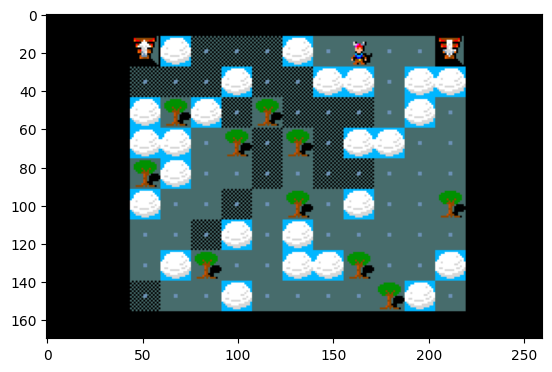

In [176]:
i = 0
win = 0
lost = 0
monsters_win = []
monsters_lost = []

def dpt(game_map: np.ndarray, color_map: np.ndarray, start: Tuple[int, int], target: Tuple[int, int], heuristic: callable, env, state):
    path = a_star(game_map, color_map, start, target, heuristic, precision="cloud_dynamic")
    actions = actions_from_path(start, path[1:])
    image = plt.imshow(game[100:270, 500:760])
    done = False
    monster = None
    for index, action in enumerate(actions):
        if get_monster_location(game_map) is not None:
            monster = get_monster_type(game_map)
            new_path = a_star(game_map, color_map, path[index], target, heuristic, "cloud_dynamic")
            del path[index+1:]
            del actions[index+1:]

            path += new_path[1:]

            actions.extend(actions_from_path(path[index], path[index+1:]))


        s, _, done, info = env.step(action)
        game_map = s["chars"]
        display.display(plt.gcf())
        display.clear_output(wait=True)
        image.set_data(s['pixel'][100:270, 500:760])

        if done:
            end_status = info.get('end_status')
            if end_status == 2:
                return "W", monster
            elif end_status == 1:
                return "L", monster
            else:
                return "O", monster

    return "Not Finished", monster 

while i < 100:
    env = gym.make("MiniHack-HideNSeek-Mapped-v0", observation_keys=["chars", "pixel", "colors"])
    # reset it to initial state
    state = env.reset()
    game_map = state["chars"]
    color_map = state["colors"]
    game = state["pixel"]
    start = get_player_location(game_map)
    target = get_target_location(game_map)
    actions, monster = dpt(game_map, color_map, start, target, chebyshev_distance, env, state)
    if actions == "W":
        win += 1
        if monster is not None:
            monsters_win.append(monster)
    else:
        lost += 1
        if monster is not None:
            monsters_lost.append(monster)

    i += 1
    
print(win)
print(monsters_win)
print(lost)
print(monsters_lost)

In [ ]:
dpt(game_map, color_map, start, target, chebyshev_distance)

Let's first try with just path_finding

In [ ]:
env = gym.make(
    "MiniHack-Navigation-Custom-v0",
    observation_keys=("chars", "pixel", "colors"),
    des_file = "dat/simple_maze.des",
)
state = env.reset()
env.render()

In [ ]:
plt.imshow(state["pixel"][100:270, 500:760])

In [ ]:
game_map = state["chars"]
color_map = state["colors"]
game = state["pixel"]

start = get_player_location(game_map)
target = get_target_location(game_map)
print("Agent position:", start)
print("Target position:", target)

In [ ]:
%%time
path = a_star(game_map, color_map, start, target, chebyshev_distance)

In [ ]:
actions = actions_from_path(start, path[1:])

In [ ]:
image = plt.imshow(game[75:300, 450:800])
for action in actions:
    s, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel'][75:300, 450:800])

In [2]:
monsters_win = []
monsters_loss = []
wins = []
losses = []

for i in range(10):
    env = gym.make("MiniHack-Skill-Custom-v0", des_file="dat/fully_observable_c.des", observation_keys=["chars", "pixel", "colors"])
    # reset it to initial state
    state = env.reset()
    game_map = state["chars"]
    color_map = state["colors"]
    # game = state["pixel"]
    start = get_player_location(game_map)
    target = get_target_location(game_map)
    if target == (None, None):
        continue
    actions, monster_type = dynamic_path_finding(game_map, color_map, start, target, chebyshev_distance, env)
    if actions == "W":
        wins.append(i)
        if monster_type is not None:
            monsters_win.append(monster_type)
    else:
        losses.append(i)
        if monster_type is not None:
            monsters_loss.append(monster_type)
    
print(f"wins: {len(wins)}")
print(f"beaten monsters: {monsters_win}")
print(f"losses: {len(losses)}")
print(f"monster that got us beaten: {monsters_loss}")


                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                          ...                                                   
                  ..H.#.##.##                                                   
                  #.#..#...##                                                   
                  #.........#                                                   
                  ####..<##..                                                   
                  ...#...@#

In [3]:
np.unique(monsters_win, return_counts=True)

(array(['H', 'N'], dtype='<U1'), array([318, 278]))

In [4]:
np.unique(monsters_loss, return_counts=True)

(array(['H', 'N'], dtype='<U1'), array([ 59, 104]))

In [11]:
a[0].size

0